# Project: Investigate a Dataset - No-Show Appointment dataset.
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

### Question(s) for Analysis
#### Q1: Is there a correlation between different variables and no-show status?
#### Q2: What kind of relation between waiting time and no-show status?
#### Q3: Does the hour of schedule affect no-show status?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [4]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In this section we will load our data then look for things need to be cleaned or improvements need to be done.




In [5]:
#loading the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
Here I'll drop unnecessary columns and rows, rename columns to be more easy to use and make some other changes to the data set. Then finally saving it in a new file.
 

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#checking for NaN values
df.isnull().sum().any()

False

In [9]:
#dropping duplicates
df.drop_duplicates( inplace= True)

In [10]:
#dropping unnecissary columns
df.drop(columns=['PatientId', 'AppointmentID'], inplace= True)

In [57]:
#adding _ betwwen words in column name and making it all lower case
df.rename(columns= lambda x: x.lower().replace('-', '_'), inplace= True)

In [56]:
#editing specific column names
df.rename(columns= {'scheduledday': 'scheduled_day', 'appointmentday': 'appointment_day','hipertension': "hypertension", "handcap":'handicap'}, inplace= True)

In [13]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here I found that there is age with minus value which is impossible, so I filtered the data to start from age zero.

In [58]:
#using query to filter the data
df= df.query('age >= 0')

In [59]:
#checking for the filter
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [60]:
#making a new column for age categories to make it more easy to deal with
df['age_cat'] = pd.cut(df.age,bins=[0,2,17,65,115],labels=['Toddler/Baby','Child','Adult','Elderly'])

In [61]:
df['age_cat'].value_counts()

Adult           69846
Child           19949
Elderly         13301
Toddler/Baby     3891
Name: age_cat, dtype: int64

In [62]:
#using astype function
df['scholarship'] = df['scholarship'].astype('category')
df['hypertension'] = df['hypertension'].astype('category')
df['diabetes'] = df['diabetes'].astype('category')
df['alcoholism'] = df['alcoholism'].astype('category')
df['sms_received'] = df['sms_received'].astype('category')
df['handicap'] = df['handicap'].astype('category')
df['no_show'] = df['no_show'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 16 columns):
gender             110526 non-null object
scheduled_day      110526 non-null datetime64[ns]
appointment_day    110526 non-null datetime64[ns]
age                110526 non-null int64
neighbourhood      110526 non-null object
scholarship        110526 non-null category
hypertension       110526 non-null category
diabetes           110526 non-null category
alcoholism         110526 non-null category
handicap           110526 non-null category
sms_received       110526 non-null category
no_show            110526 non-null category
age_cat            106987 non-null category
day                110526 non-null object
sched_day          110526 non-null object
app_day            110526 non-null object
dtypes: category(8), datetime64[ns](2), int64(1), object(5)
memory usage: 8.4+ MB


In [63]:
#Changing the values of no_show column to make it more expressive
df["no_show"].replace({"Yes": "Miss", "No": "Catch"}, inplace=True)

In [64]:
df.to_csv('no_show_clean.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis

In this section we will explore our cleaned data using some methods and statistics to draw patterns and conclude results if possible.

##### But first let's define some functions that will help us in our work.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
df = pd.read_csv('no_show_clean.csv')

In [3]:
#converting to date format
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])

#separating a new column for each week day name
df['app_day'] = df['appointment_day'].dt.day_name()
df['app_day'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: app_day, dtype: int64

In [4]:
#separating a new column for each week day name


df['sched_day'] = df['scheduled_day'].dt.day_name()

In [35]:
#creating a function to plot a bar showing percentage
def percent(x,y):
    """This functions takes 2 column names in '' and returns a bar chart comparing to each other with percentage"""
    
    df1 = df.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.barplot(x=x,y='percent',hue=y,data=df1)
    g.set_ylim(0,100)

    for p in g.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.text(txt_x,txt_y,txt)



In [6]:
def pie(col):
    """This functions takes 1 column name in '' and  returns a pie chart for the value counts of that column"""


    df[col].value_counts().plot(kind= 'pie');
    
    

In [7]:
def bar(col):
    """This functions takes 1 column name in '' and returns a bar chart comparing it to "no_show" status column """


    sns.countplot(data = df, x = col , hue = 'no_show')
    plt.xticks(rotation=45);

In [8]:
def three_bar(a,b,c):
    """This functions takes 3 column names in '' and returns a bar chart comparing to each other with grouping a & b together comparing them to c"""


    exp = df.groupby([a, b])[c].value_counts().unstack(level=0)
    exp.plot(kind='bar', figsize=(15,15));

### Q1: Is there a correlation between different variables and no-show status?

Let's explore with each variable.

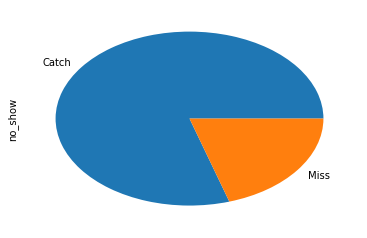

In [9]:
#first let's see a pie chart for no_show count
pie('no_show')

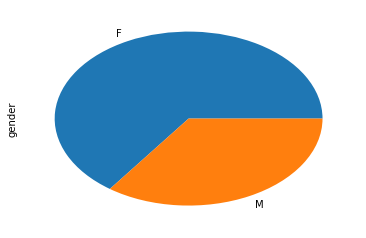

In [10]:
#pie chart for gender
pie('gender')

As we see in 2 pie charts above, females are more than males, and those who catched the appointment are much more

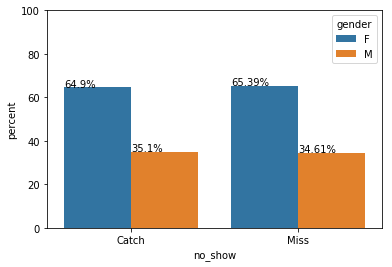

In [36]:
#let's see the relation between gender and no show status
percent('no_show','gender')

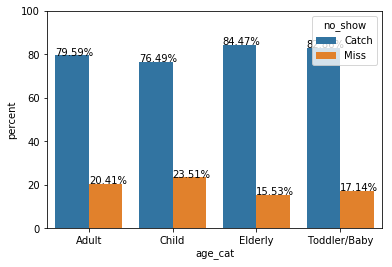

In [38]:
percent( 'age_cat','no_show')

The percentage of elderly and toddlers/ babies is slightly higher than adults and children.

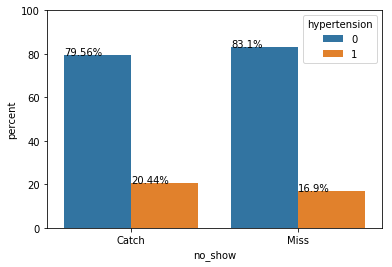

In [39]:
percent('no_show', "hypertension")

Those with hypertension are more likely to catch the appointment than the others.

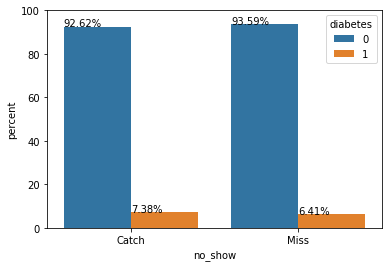

In [89]:
percent("no_show","diabetes")

Those with diabetes are slightly more likely to catch the appointment than the others.

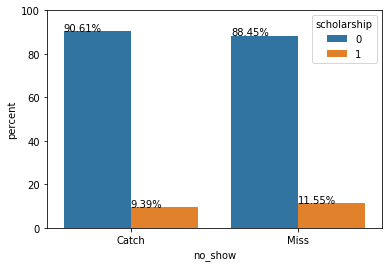

In [90]:
percent("no_show","scholarship")

Those who don't have scholarship are slightly more likely to catch the appointment than the others.

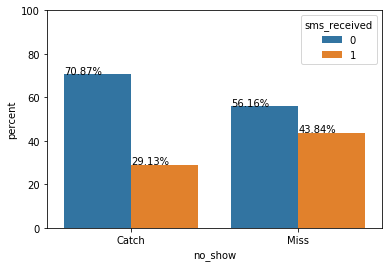

In [40]:
percent('no_show', "sms_received")

#### This is the first variable that shows a big difference.

As we see here, those who didn't received sms are much more likely to catch than those who received sms.

You can notice that sms make it even worse for those who missed.

we will come to that later.


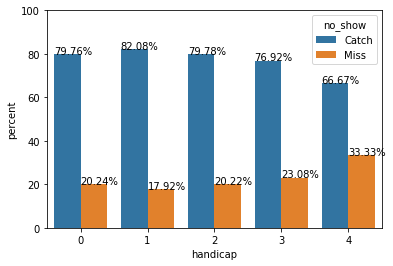

In [91]:
percent("handicap",'no_show')

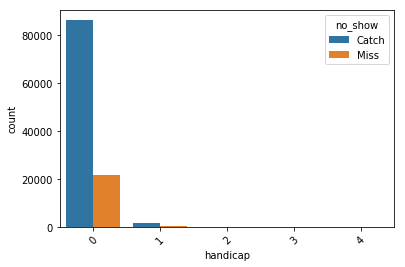

In [92]:
bar('handicap')

For a while I thought those with handicap of 4 show higher percentage of missing, but according to count, the count for the four values except zero are neglicable.

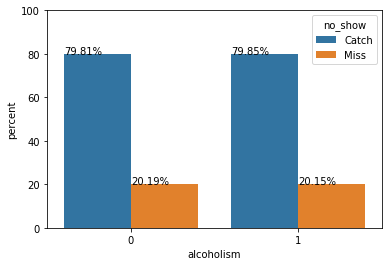

In [93]:
percent("alcoholism",'no_show')

I don't think there is a correlation between alcoholism and no show status


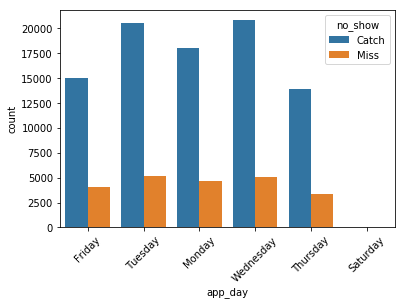

In [97]:
bar("app_day")

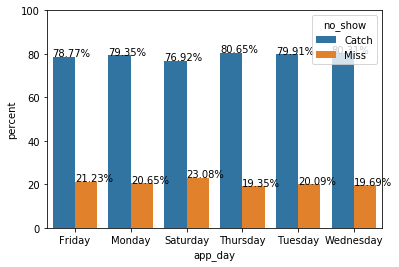

In [98]:
percent("app_day", 'no_show')

There is almost no difference in appointment day and show status, except that Wednesday and Tuesday have more appointments.

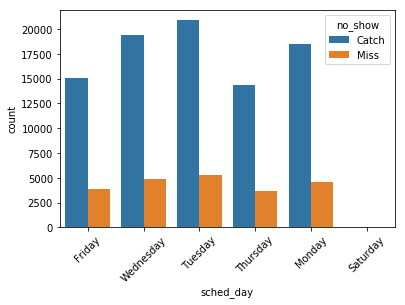

In [48]:
bar("sched_day")

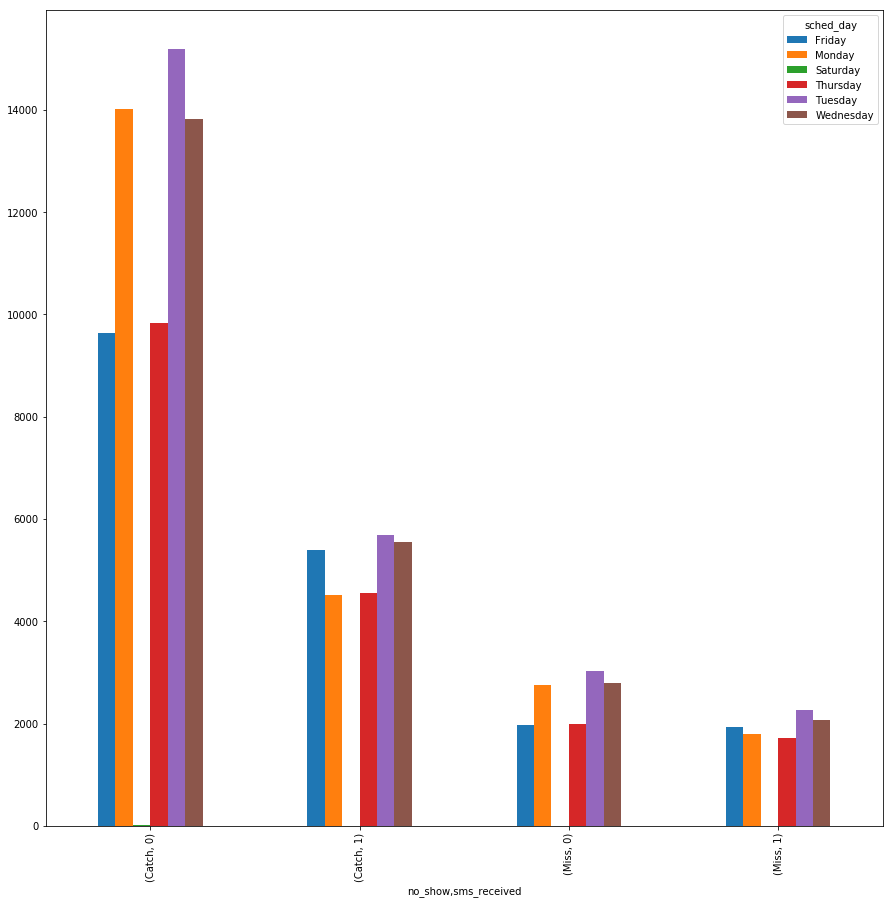

In [99]:
three_bar("sched_day",'no_show', "sms_received")

Again, as you can see the effect of sms.


### Q2: What kind of relation between waiting time and no-show status?

First, let's make a new column for the difference between appointment day and scheduled day.

In [101]:
#making the new column
df['waiting'] =  df['appointment_day'].sub(df['scheduled_day'], axis=0).astype(str)

#splitting the new column to include only 'int' number of days.
df['waiting'] = df['waiting'].str.split('d').str[0].astype(int)


#converting the column into categorial values.
#the value of -1 means the appointment is the same day scheduled. The first and last values are errors, but we can neglict their effect
bins =[-7.000000, -1.000000, 3.000000, 14.000000, 178.000000]
labels = [ 'negative', '3 days','2 weeks', 'too far']

df['waiting']= pd.cut(df.waiting,bins=bins ,labels= labels)


In [102]:
df['waiting'].head()

0    negative
1    negative
2    negative
3    negative
4    negative
Name: waiting, dtype: category
Categories (4, object): [negative < 3 days < 2 weeks < too far]

Let's see the correlation between waiting time and no-show status. 
I can't wait!



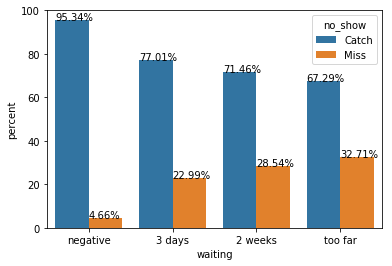

In [104]:
#first let's see it in percentage
percent('waiting','no_show')

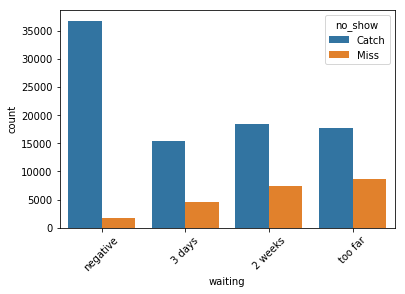

In [106]:
#let's show the count
bar('waiting')

#### Eureca!

As you can see,the near the waiting intervals, the more likely they won't miss the appointment.

##### The same-day appointment shows the highest percentage and count, that means what?

### Q3: Does the hour of schedule affect no-show status?

First let's extract the day hours.

In [107]:
df['hour']= df['scheduled_day'].dt.hour
df['hour'].head()

0    18
1    16
2    16
3    17
4    16
Name: hour, dtype: int64

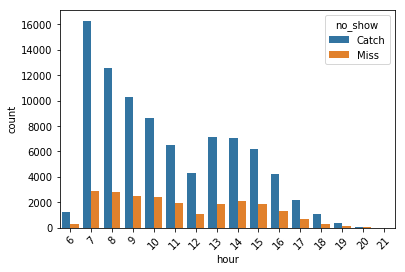

In [108]:
bar('hour')


As you can see, there are certain times that shows the highest rates, starting from 7 Am, decreasing by time, then increase again at 1 Pm just for 3 hours then vanishes.




<a id='conclusions'></a>
## Conclusions
There are some factors that affects the results directly like SMS, waiting time and schedule hour.
As I explored the other factors, I couldn't reach for a strong correlation between them, which are all related to the patient himself.

That leads us to a conclusion that what affect the No-show status is factors related to operations and service. My justification for that is as follows:

##### - The correlation between waiting and no-show suggest that making it fast will increase the conversion rates'in marketing terms!'
##### - There are certain times that shows higher rates. But in needs more data in that to reach a solid conclusion.
##### - The most important factor is SMSs received 'I prefer using sent!' to the patients which make things worse.

### Limitations
To reach a solid conclusion we need more data related to the operations than this.

- Adding more information about time
- Adding more data about SMSs like frequency, number of messages and time sent.
- Looking closely to the content sent in the SMSs.


In [109]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0